In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import numpy as np
from IPython.display import YouTubeVideo

In [3]:
def video_count(filenames, video_count_dict):
    for filename in filenames:
        for example in tf.python_io.tf_record_iterator(filename):
            tf_example = tf.train.Example.FromString(example)
            
            labels = tf_example.features.feature['labels'].int64_list.value
            for label in labels:
                if label in video_count_dict:
                    video_count_dict[label] = video_count_dict[label] + 1
                else:
                    video_count_dict[label] = 1

In [9]:
filenames = ["video_level/train{}.tfrecord".format(i) for i in range(30)]
video_count_dict = {}
video_count(filenames, video_count_dict)

In [20]:
sorted_video_count = sorted(video_count_dict.items(), key=operator.itemgetter(1))
top_label_rgb_dict = {}
top_label_audio_dict = {}
for elem in sorted_video_count[::-1]:
    # pass
    # print(elem[1])
    if elem[1] >= 1000:
        top_label_rgb_dict[elem[0]] = np.zeros(1024)
        top_label_audio_dict[elem[0]] = np.zeros(128)
    else:
        break

In [24]:
def top_label_statistics(filenames, top_label_rgb_dict, top_label_audio_dict):
    for filename in filenames:
        for example in tf.python_io.tf_record_iterator(filename):
            tf_example = tf.train.Example.FromString(example)

            mean_rgb = tf_example.features.feature['mean_rgb'].float_list.value
            mean_audio = tf_example.features.feature['mean_audio'].float_list.value
            labels = tf_example.features.feature['labels'].int64_list.value

            for label in labels:
                    if label in top_label_rgb_dict:
                        for pos in range(len(mean_rgb)):
                            top_label_rgb_dict[label][pos] = top_label_rgb_dict[label][pos] + mean_rgb[pos]
                        for pos in range(len(mean_audio)):
                            top_label_audio_dict[label][pos] = top_label_audio_dict[label][pos] + mean_audio[pos]

In [25]:
top_label_statistics(filenames, top_label_rgb_dict, top_label_audio_dict)

In [27]:
for key, elem in top_label_rgb_dict.items():
    top_label_rgb_dict[key] = top_label_rgb_dict[key]/video_count_dict[key]
    
for key, elem in top_label_audio_dict.items():
    top_label_audio_dict[key] = top_label_audio_dict[key]/video_count_dict[key]

3635
3753


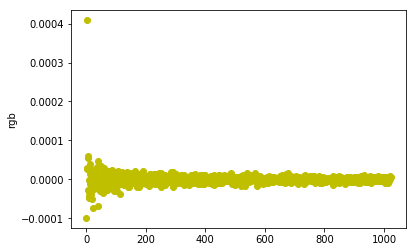

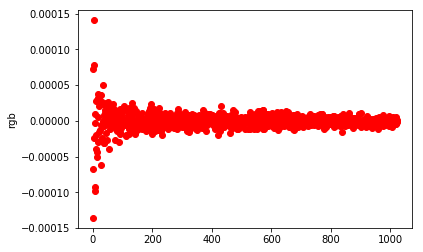

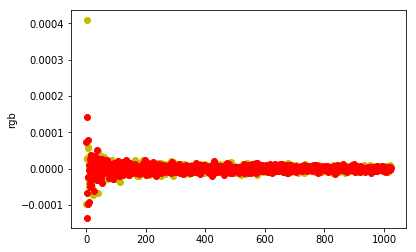

In [93]:
import matplotlib.pyplot as plt

y = 3
r = 2

print(video_count_dict[y])
print(video_count_dict[r])

plt.plot(range(1024), top_label_rgb_dict[y] , 'yo')
plt.ylabel('rgb')
plt.show()

plt.plot(range(1024), top_label_rgb_dict[r] , 'ro')
plt.ylabel('rgb')
plt.show()

plt.plot(range(1024), top_label_rgb_dict[y] , 'yo')
plt.plot(range(1024), top_label_rgb_dict[r] , 'ro')
plt.ylabel('rgb')
plt.show()

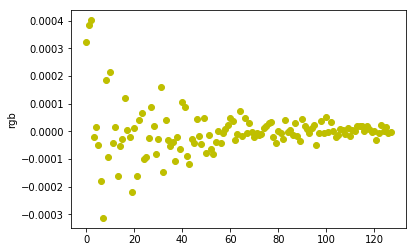

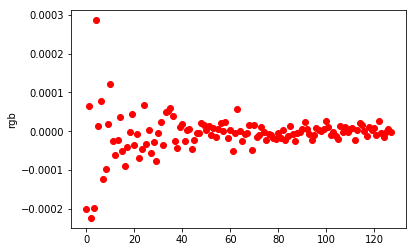

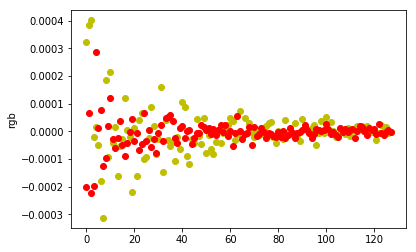

In [106]:
y = 5
r = 4

plt.plot(range(128), top_label_audio_dict[y] , 'yo')
plt.ylabel('rgb')
plt.show()

plt.plot(range(128), top_label_audio_dict[r] , 'ro')
plt.ylabel('rgb')
plt.show()

plt.plot(range(128), top_label_audio_dict[y] , 'yo')
plt.plot(range(128), top_label_audio_dict[r] , 'ro')
plt.ylabel('rgb')
plt.show()

In [120]:
frame_lvl_record = "frame_level/train-0.tfrecord"
for example in tf.python_io.tf_record_iterator(frame_lvl_record):
    tf_example = tf.train.Example.FromString(example)
    video_id = tf_example.features.feature['video_id'].bytes_list.value[0].decode(encoding='UTF-8')
    print(video_id)
    break
    
video_lvl_record = "video_level/train0.tfrecord"
for example in tf.python_io.tf_record_iterator(video_lvl_record):
    tf_example = tf.train.Example.FromString(example)
    video_id = tf_example.features.feature['video_id'].bytes_list.value[0].decode(encoding='UTF-8')
    print(video_id)
    break
    

-09K4OPZSSo
-09K4OPZSSo
